### Реализовать и обучить (с нуля) СНС для задачи классификации изображений на датасете CIFAR-10

In [1]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

In [3]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.cifar10.load_data()

print(train_x.shape, train_x.dtype)
print(test_x.shape, test_x.dtype)
print(train_y.shape, train_y.dtype)
print(test_y.shape, test_y.dtype)

170498071/170498071 [==============================] - 14s 0us/step
(50000, 32, 32, 3) uint8
(10000, 32, 32, 3) uint8
(50000, 1) uint8
(10000, 1) uint8


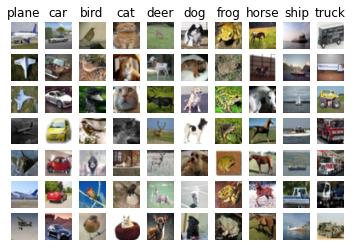

In [4]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(train_y == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(train_x[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [5]:
train_x = train_x.reshape(-1, 32, 32, 3).astype(np.float32) / 255.
test_x = test_x.reshape(-1, 32, 32, 3).astype(np.float32) / 255.

train_y = train_y.reshape(-1).astype(np.int32)
test_y = test_y.reshape(-1).astype(np.int32)

print(train_x.shape, train_x.dtype)
print(train_y.shape, train_y.dtype)
print(test_x.shape, test_x.dtype)
print(test_y.shape, test_y.dtype)

(50000, 32, 32, 3) float32
(50000,) int32
(10000, 32, 32, 3) float32
(10000,) int32


In [6]:
train_y

array([6, 9, 9, ..., 9, 1, 1], dtype=int32)

[[[0.5125891  0.5335556  0.5198208 ]
  [0.51035565 0.5311504  0.51707786]
  [0.51392424 0.5343016  0.5199328 ]
  [0.51595825 0.535995   0.5210931 ]
  [0.51837546 0.5381541  0.5226226 ]
  [0.5209901  0.5406102  0.52463686]
  [0.52302873 0.5422941  0.526108  ]
  [0.5250642  0.54408634 0.52755016]
  [0.5273931  0.5461816  0.5294758 ]
  [0.52915096 0.5475848  0.53056467]
  [0.53033257 0.5487945  0.53142065]
  [0.53100014 0.5493823  0.532008  ]
  [0.5318505  0.5500815  0.53262335]
  [0.53190315 0.550054   0.53259194]
  [0.53190464 0.5499133  0.53247046]
  [0.53181446 0.54970396 0.5322407 ]
  [0.53149545 0.54939365 0.53170216]
  [0.53139186 0.5492686  0.5315995 ]
  [0.53134245 0.5492373  0.5316772 ]
  [0.53092    0.54887486 0.5312779 ]
  [0.52984685 0.54790294 0.53024596]
  [0.5292543  0.5475318  0.53011733]
  [0.5286725  0.5470605  0.5298459 ]
  [0.52755964 0.5462715  0.5291427 ]
  [0.52567685 0.54489666 0.52795166]
  [0.52395415 0.5434869  0.52681994]
  [0.5218709  0.5416036  0.52525735]
 

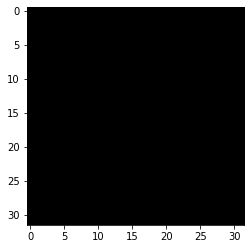

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [7]:
# Нормализуем значения яркости пикселей 
mean_image = np.mean(train_x, axis=0)
print(mean_image[:10]) 

# визуализируем среднюю яркость
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8')) 
plt.show()

# Вычтем средние значения яркости
train_x -= mean_image
test_x -= mean_image

print(train_x.shape, test_x.shape)

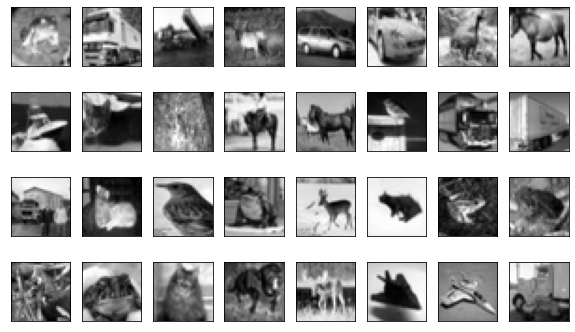

In [8]:
some_samples = train_x[:32, ...]

fig = plt.figure(figsize=(10, 6))
for j in range(some_samples.shape[0]):
    ax = fig.add_subplot(4, 8, j+1)
    ax.imshow(some_samples[j,:,:,0], cmap='gray')
    plt.xticks([]), plt.yticks([])
plt.show()

In [47]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (4, 4), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2), (2, 2)),
    tf.keras.layers.Conv2D(64, (4, 4), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2), (2, 2)),
    tf.keras.layers.Conv2D(128, (4, 4), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2), (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [48]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [49]:
NUM_EPOCHS = 20

model.fit(train_x, train_y, epochs=NUM_EPOCHS)

Epoch 1/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2966 - accuracy: 0.5344
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8511 - accuracy: 0.7006
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6740 - accuracy: 0.7641
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5470 - accuracy: 0.8065
Epoch 5/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4476 - accuracy: 0.8441
Epoch 6/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.3492 - accuracy: 0.8762
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2736 - accuracy: 0.9019
Epoch 8/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2162 - accuracy: 0.9231
Epoch 9/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1704 - accuracy: 0.9389
Epoch 10/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.150

In [50]:
# оценка качества
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 4ms/step - loss: 1.9264 - accuracy: 0.7475


[1.926425576210022, 0.7475000023841858]

In [51]:
# примеры инференса
sample = test_x[0, ...]
prediction = model(sample[None, ...])[0]
print(prediction)

tf.Tensor(
[4.6852487e-12 2.4539901e-12 1.0759851e-13 2.9633628e-02 4.3930548e-20
 9.7036630e-01 8.2997957e-08 6.7246062e-13 2.5894892e-12 1.9755410e-08], shape=(10,), dtype=float32)


In [52]:
# Функция для инференса и отображения результата предсказания
def test_digit(sample):
    
    # prediction = model(sample[None, ...])[0]
    logits = model(sample[None, ...])[0]
    prediction = tf.nn.softmax(logits)
    ans = np.argmax(prediction)
    
    fig = plt.figure(figsize=(12,4))

    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(sample[:,:,0], cmap='gray')
    plt.xticks([]), plt.yticks([])

    ax = fig.add_subplot(1, 2, 2)
    bar_list = ax.bar(np.arange(10), prediction, align='center')
    bar_list[ans].set_color('g')
    ax.set_xticks(np.arange(10))
    ax.set_xlim([-1, 10])
    ax.grid(True)

    plt.show()
    
    print('Predicted number: {}'.format(ans))

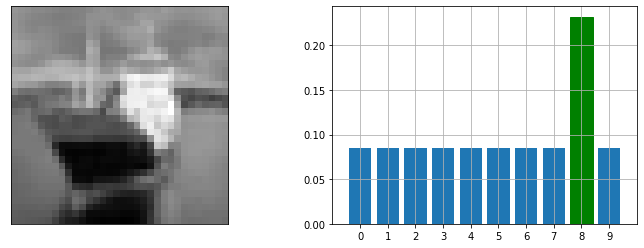

Predicted number: 8
True Answer: 8 -  ship


In [58]:
# Запуск предсказания
import random
idx = random.randint(0, test_x.shape[0])
sample = test_x[idx, ...]
test_digit(sample)

print(f'True Answer: {test_y[idx]} -  {classes[test_y[idx]]}')